[Versión Interactiva](https://mybinder.org/v2/git/https%3A%2F%2Fgithub.com%2Fjuandadamo%2Fclases_fiuba/HEAD?filepath=6731%2Faletas.ipynb)

In [1]:
!pip install matplotlib numpy scipy

In [2]:
%matplotlib notebook
import numpy as np # linear algebra
import matplotlib.pyplot as plt
import matplotlib as mpl
from scipy.special import erf # doctest: +SCIPY

In [3]:
def temp_aleta(x,y,th,L,k,h_bar,T_infinity,T_b):
    N = 100
    i_serie = np.arange(0,N)
    lambdai = (1+2*i_serie)*np.pi/(2*L)
    Ci = 2*(T_infinity-T_b)/(L*lambdai*(k*lambdai * np.sinh(lambdai*th/2)/h_bar+np.cosh(lambdai*th/2)))
    thetai = Ci*np.sin(lambdai*x)*np.cosh(lambdai*y)
    theta = thetai.sum()
    Temp = theta+T_b
    return Temp


def eta_aleta(th,L,k,h_bar):
    N = 100
    i_serie = np.arange(0,N)
    lambdai = (1+2*i_serie)*np.pi/(2*L)
    eta_i=(2*k/(h_bar*lambdai*L**2))*np.sinh(lambdai*th/2)/(k*lambdai*np.sinh(lambdai* th/2)/h_bar+
np.cosh(lambdai*th/2))
    
    return eta_i.sum()

def eta_1D(th,L,k,h_bar):
    mL = (h_bar*2/(k*th))**0.5*L
    eta = np.tanh(mL)/mL
    return eta

## Conducción estacionaria 
### Soluciones Analíticas


## $$ \nabla^2 T=0$$

#### Condiciones de Borde

<figure class="half" style="display:flex">
    <img style="width:500px" src="../figures/aleta_CB_1.png">
    <img style="width:500px" src="../figures/aleta_CB_2.png">
</figure>


\begin{align}
\theta = \sum_{i=0}^{\infty}C_i\sin(\lambda_ix)\cosh(\lambda_i y) \\
\lambda_i = (1+2i) \frac{\pi}{2L} \\
C_i = \frac{2\theta_\infty}{\displaystyle\ L\lambda_i\left[\frac{k\lambda_i}{\bar h}\sinh\left(\lambda_i\frac{th}{2}\right)+\cosh\left(\lambda_i\frac{th}{2}\right)\right]}
\end{align}

#### Distribución de temperaturas en una aleta de $L=5$ cm de largo y $th=4$ cm de espesor con conductividad $k=0.5$ W/mK y $\bar h=100$ W/m$^2$K. La temperatura de base es 200$^\circ$ C y la temperatura del fluido circundante es de 20$^\circ$C.

In [13]:
th =4e-2
L=5e-2
k=0.5
h_bar=100
T_b=200
T_infinity=20

#Geometría
y_bar = 0.5
x_bar = 0.5
y = y_bar*th
x = x_bar*L

k=0.1
#número de términos de la serie
N = 100

In [14]:
i_serie = np.arange(0,N)
lambdai = (1+2*i_serie)*np.pi/(2*L)
Ci = 2*(T_infinity-T_b)/(L*lambdai*(k*lambdai * np.sinh(lambdai*th/2)/h_bar+np.cosh(lambdai*th/2)))
thetai = Ci*np.sin(lambdai*x)*np.cosh(lambdai*y)
theta = thetai.sum()
Temp = theta+T_b

In [15]:
y_bar = np.array([0,0.25,0.5])
x_bar = np.arange(0,1,0.1)
y = y_bar*th
x = x_bar*L

XBAR,YBAR = np.meshgrid(x_bar,y_bar)

Txy = np.zeros_like(XBAR)

for i1,ybari in enumerate(y_bar):
    y = ybari * th 
    for i2,xbari in enumerate(x_bar):
        x = xbari*L
        Txy[i1,i2] = temp_aleta(x,y,th,L,k,h_bar,T_infinity,T_b)
    

<IPython.core.display.Javascript object>


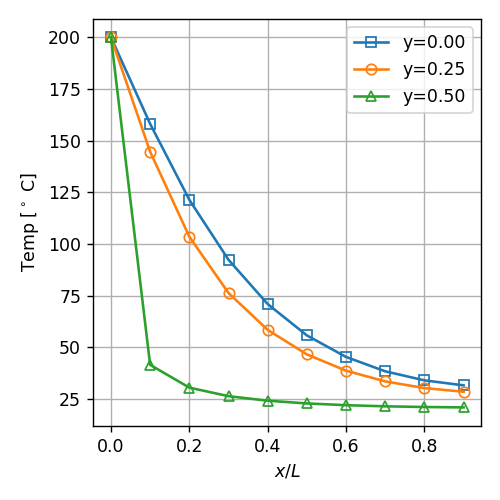

In [16]:
fig0,ax0 = plt.subplots(figsize=(4,4))
ax0.plot(x_bar,Txy[0,:],marker='s',markerfacecolor='none',label='y=%.2f'%y_bar[0])
ax0.plot(x_bar,Txy[1,:],marker='o',markerfacecolor='none',label='y=%.2f'%y_bar[1])
ax0.plot(x_bar,Txy[2,:],marker='^',markerfacecolor='none',label='y=%.2f'%y_bar[2]);
ax0.set_xlabel('$x/L$')
ax0.set_ylabel('Temp [$^\circ$ C]');
ax0.grid()
ax0.legend()
fig0.tight_layout()

### $$\text{Bi} = \frac{\bar h th}{2 k}$$

#### Relevante en este problema 2D

In [12]:
Bi = h_bar*th/2/k
print('Biot = %.2f'%Bi)

Biot = 0.02


## Eficiencia

### $$\eta = \frac{\dot q_{aleta}}{2\bar h W L(T_0-T_\infty)}$$

In [9]:
eta_i=(2*k/(h_bar*lambdai*L**2))*np.sinh(lambdai*th/2)/(k*lambdai*np.sinh(lambdai* th/2)/h_bar+
np.cosh(lambdai*th/2))

### $$\eta_i = \frac{2 k}{\bar h L^2}\sum_{i=0}^\infty \frac{\displaystyle \sinh\left(\lambda_i \frac{th}{2}\right)}{\lambda_i\displaystyle \left[\frac{k\lambda_i}{\bar h}\sinh\left(\lambda_i\frac{th}{2}\right)+\cosh\left(\lambda_i\frac{th}{2}\right)\right]} $$ 

### Para el problema 1D
### $$\eta_{1D} = \frac{\tanh\left(mL\right)}{mL}$$
### donde $$mL=\sqrt{\frac{\bar h 2}{k th}}L$$

<IPython.core.display.Javascript object>


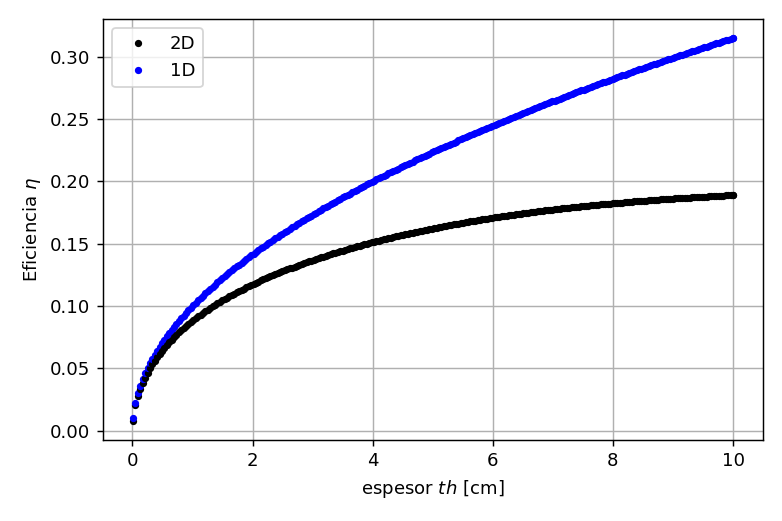

In [10]:
th_s = np.linspace(0.01,10,250)*1e-2
fig1,ax1 = plt.subplots(figsize=(6,4))
for th_i in th_s:
    ax1.plot(th_i/1e-2,eta_aleta(th_i,L,k,h_bar),'k.')
    ax1.plot(th_i/1e-2,eta_1D(th_i,L,k,h_bar),'b.')
ax1.plot(th_i/1e-2,eta_aleta(th_i,L,k,h_bar),'k.',label='2D')
ax1.plot(th_i/1e-2,eta_1D(th_i,L,k,h_bar),'b.',label='1D')   
ax1.legend()
ax1.grid()
ax1.set_xlabel('espesor $th$ [cm]')
ax1.set_ylabel('Eficiencia $\eta$');
fig1.tight_layout()